<a href="https://colab.research.google.com/github/ottodranik/machine-learning/blob/master/UA_softmax_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Регресія Softmax

Регресія Softmax, яку також називають мультиноміальною логістичною регресією, розширює [логістичну регресію](logistic_regression.ipynb) на кілька класів.

**Given:** 
- набір даних $\{(\boldsymbol{x}^{(1)}, y^{(1)}), ..., (\boldsymbol{x}^{(m)}, y^{(m)})\}$
- де $\boldsymbol{x}^{(i)}$ це $d$-розмірний вектор $\boldsymbol{x}^{(i)} = (x^{(i)}_1, ..., x^{(i)}_d)$
- а $y^{(i)}$ – цільова змінна для $\boldsymbol{x}^{(i)}$, наприклад при $K = 3$ класи ми будемо мати $y^{(i)} \in \{0, 1, 2\}$

Модель регресії softmax має такі особливості: 
- окремий вектор реальних вагових коефіцієнтів $\boldsymbol{w}= (w^{(1)}, ..., w^{(d)})$ для кожного класу. Вагові вектори зазвичай зберігаються у вигляді рядків у ваговій матриці.
- окремий реальний зсув $b$ для кожного класу
- функція softmax як функція активації
- функція втрати перехресної ентропії

Тренувальна процедура регресійної моделі softmax має різні етапи. На початку (етап 0) параметри моделі ініціалізуються. Інші етапи (див. нижче) повторюються для певної кількості навчальних ітерацій або до збігу параметрів.

Ілюстрація всієї процедури подана нижче.

![title](https://github.com/YKochura/ml_basics/blob/main/figures/softmax_regression.jpg?raw=1)

* * * 
**ЕТАП 0:** Ініціалізувати вагову матрицю та значення зсуву нулями (або малими випадковими значеннями).
* * *

**ЕТАП 1:** Для кожного класу $k$ обчислити лінійну комбінацію вхідних ознак та вектора ваги класу $k$, тобто для кожного прикладу навчання обчислити оцінку для кожного класу. Для класу $k$ та вхідного вектору $\boldsymbol{x}^{(i)} $ маємо:

$score_{k}(\boldsymbol{x}^{(i)}) = \boldsymbol{w}_{k}^T \cdot \boldsymbol{x}^{(i)} + b_{k}$

де $\cdot$ – це скалярний добуток, а $\boldsymbol{w}_{(k)}$ – вектор ваги класу $k$. Ми можемо обчислити оцінки (scores) для всіх класів та прикладів навчання паралельно, використовуючи векторизацію та трансляцію:

$\boldsymbol{scores} = \boldsymbol{X} \cdot \boldsymbol{W}^T + \boldsymbol{b} $

де $\boldsymbol{X}$ – це матриця форми $(n_{samples}, n_{features})$ що містить усі навчальні приклади, а $\boldsymbol{W}$ – матриця форми $(n_{classes}, n_{features})$ що містить вектор ваги для кожного класу.
* * *

**ЕТАП 2:** Застосувати функцію активації softmax, щоб перетворити оцінки на ймовірності. Імовірність того, що вхідний вектор $\boldsymbol{x}^{(i)}$ належить до класу $k$ задається рівнянням:

$\hat{p}_k(\boldsymbol{x}^{(i)}) = \frac{\exp(score_{k}(\boldsymbol{x}^{(i)}))}{\sum_{j=1}^{K} \exp(score_{j}(\boldsymbol{x}^{(i)}))}$

Знову ж таки, ми можемо виконати цей крок одночасно для всіх класів та прикладів навчання, використовуючи векторизацію. Клас, передбачений моделлю для $\boldsymbol{x}^{(i)}$ тоді є просто класом з найбільшою ймовірністю.

* * *

**ЕТАП 3:** Обчислити вартість за весь навчальний набір. Ми хочемо, щоб наша модель передбачала високу ймовірність для цільового класу та низьку ймовірність для інших класів. Цього можна досягти за допомогою функції втрати перехресної ентропії:

$J(\boldsymbol{W},b) = - \frac{1}{m} \sum_{i=1}^m \sum_{k=1}^{K} \Big[ y_k^{(i)} \log(\hat{p}_k^{(i)})\Big]$

У цій формулі цільові мітки кодуються *одноразово*. Отже $y_k^{(i)}$ дорівнює $1$ – цільовий клас для $\boldsymbol{x}^{(i)}$ дорівнює k, інакше $y_k^{(i)}$ дорівнює $0$.

Примітка: коли є лише два класи, ця функція вартості еквівалентна функції вартості [логістичної регресії](logistic_regression.ipynb).
* * *

**ЕТАП 4:** Обчислити градієнт функції вартості щодо кожного вагового вектора та зсуву. Детальне пояснення цього виведення можна знайти [тут](http://ufldl.stanford.edu/tutorial/supervised/SoftmaxRegression/)

Загальна формула для класу $k$ задана формулою:

$ \nabla_{\boldsymbol{w}_k} J(\boldsymbol{W}, b) = \frac{1}{m}\sum_{i=1}^m\boldsymbol{x}^{(i)} \left[\hat{p}_k^{(i)}-y_k^{(i)}\right]$

Для зсуву, вхідні дані $\boldsymbol{x}^{(i)}$ будуть дорівнювати 1.
* * *

**ЕТАП 5:** Оновити вагові коефіцієнти та зсув для кожного класу $k$:

$\boldsymbol{w}_k = \boldsymbol{w}_k - \eta \, \nabla_{\boldsymbol{w}_k} J$  

$b_k = b_k - \eta \, \nabla_{b_k} J$

де $\eta$ – це швидкість навчання

In [1]:
from sklearn.datasets import load_iris
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
np.random.seed(13)

## Набір даних

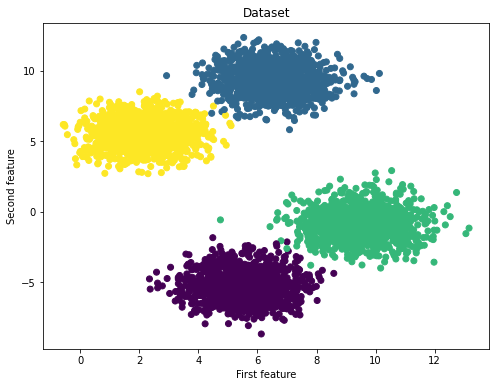

In [2]:
X, y_true = make_blobs(centers=4, n_samples = 5000)

fig = plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c=y_true)
plt.title("Dataset")
plt.xlabel("First feature")
plt.ylabel("Second feature")
plt.show()

In [3]:
# reshape targets to get column vector with shape (n_samples, 1)
y_true = y_true[:, np.newaxis]
# Split the data into a training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y_true)

print(f'Shape X_train: {X_train.shape}')
print(f'Shape y_train: {y_train.shape}')
print(f'Shape X_test: {X_test.shape}')
print(f'Shape y_test: {y_test.shape}')

Shape X_train: (3750, 2)
Shape y_train: (3750, 1)
Shape X_test: (1250, 2)
Shape y_test: (1250, 1)


## Клас Softmax-регресії


In [4]:
class SoftmaxRegressor:

    def __init__(self):
        pass

    def train(self, X, y_true, n_classes, n_iters=10, learning_rate=0.1):
        """
        Trains a multinomial logistic regression model on given set of training data
        """
        self.n_samples, n_features = X.shape
        self.n_classes = n_classes
        
        self.weights = np.random.rand(self.n_classes, n_features)
        self.bias = np.zeros((1, self.n_classes))
        all_losses = []
        
        for i in range(n_iters):
            scores = self.compute_scores(X)
            probs = self.softmax(scores)
            y_predict = np.argmax(probs, axis=1)[:, np.newaxis]
            y_one_hot = self.one_hot(y_true)

            loss = self.cross_entropy(y_one_hot, probs)
            all_losses.append(loss)

            dw = (1 / self.n_samples) * np.dot(X.T, (probs - y_one_hot))
            db = (1 / self.n_samples) * np.sum(probs - y_one_hot, axis=0)

            self.weights = self.weights - learning_rate * dw.T
            self.bias = self.bias - learning_rate * db

            if i % 100 == 0:
                print(f'Iteration number: {i}, loss: {np.round(loss, 4)}')

        return self.weights, self.bias, all_losses

    def predict(self, X):
        """
        Predict class labels for samples in X.
        
        Args:
            X: numpy array of shape (n_samples, n_features)
        Returns:
            numpy array of shape (n_samples, 1) with predicted classes
        """
        scores = self.compute_scores(X)
        probs = self.softmax(scores)
        return np.argmax(probs, axis=1)[:, np.newaxis]

    def softmax(self, scores):
        """
        Tranforms matrix of predicted scores to matrix of probabilities
        
        Args:
            scores: numpy array of shape (n_samples, n_classes)
            with unnormalized scores
        Returns:
            softmax: numpy array of shape (n_samples, n_classes)
            with probabilities
        """
        exp = np.exp(scores)
        sum_exp = np.sum(np.exp(scores), axis=1, keepdims=True)
        softmax = exp / sum_exp
        
        return softmax

    def compute_scores(self, X):
        """
        Computes class-scores for samples in X
        
        Args:
            X: numpy array of shape (n_samples, n_features)
        Returns:
            scores: numpy array of shape (n_samples, n_classes)
        """
        return np.dot(X, self.weights.T) + self.bias

    def cross_entropy(self, y_true, probs):
        loss = - (1 / self.n_samples) * np.sum(y_true * np.log(probs))
        return loss

    def one_hot(self, y):
        """
        Tranforms vector y of labels to one-hot encoded matrix
        """
        one_hot = np.zeros((self.n_samples, self.n_classes))
        one_hot[np.arange(self.n_samples), y.T] = 1
        return one_hot

## Ініціалізація та навчання моделі

Iteration number: 0, loss: 3.1901
Iteration number: 100, loss: 0.2031
Iteration number: 200, loss: 0.1589
Iteration number: 300, loss: 0.1358
Iteration number: 400, loss: 0.1199
Iteration number: 500, loss: 0.1079
Iteration number: 600, loss: 0.0982
Iteration number: 700, loss: 0.0902


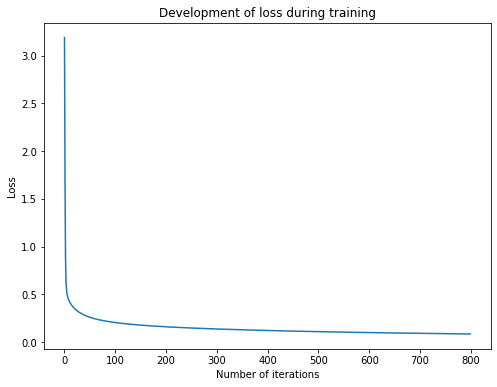

In [5]:
regressor = SoftmaxRegressor()
w_trained, b_trained, loss = regressor.train(X_train, y_train, learning_rate=0.1, n_iters=800, n_classes=4)

fig = plt.figure(figsize=(8,6))
plt.plot(np.arange(800), loss)
plt.title("Development of loss during training")
plt.xlabel("Number of iterations")
plt.ylabel("Loss")
plt.show()

## Тестування моделі

In [6]:
n_test_samples, _ = X_test.shape
y_predict = regressor.predict(X_test)
print(f"Classification accuracy on test set: {(np.sum(y_predict == y_test)/n_test_samples) * 100}%")

Classification accuracy on test set: 99.03999999999999%


## Особливості:

- Регресія Softmax – це узагальнення логістичної регресії.
- Навідміну від просто логістичної регресії, яка по суті є бінарним класифікатором, softmax-регресія – це один зі способів реалізації багатокласового класифікатора.
- Кількість вихідних шарів в регресії softmax дорівнює кількості класів, які потрібно передбачити.
- Як правило використовується у ситуаціях, коли існує проблема класифікації кільков класів, є тільки одна вірна відповідь і при цьому вихідні дані є взаємовиключними.


#### Переваги:
- В цілому, логістичну регресію легше впровадити, інтерпретувати і дуже ефективно навчати.
- Конкретно Softmax (мультиноміальна регресія) – це логістична регресія, яка поширина на декілька класів.
- Являє собою природний імовірнісний погляд на передбачення класів.
- Також цей метод не тільки дає міру того, наскільки доречним є предиктор (розмір коефіцієнта), але також і його напрямок асоціації (позитивний чи негативний).
- Класифікація невідомих записів відбувається досить швидко.
- Метод володіє хорошою точністю для багатьох простих наборів даних (особливо, якщо набір даних лінійно відокремлюваний).
- Може інтерпретувати модельні коефіцієнти як показники важливості тієї чи іншої ознаки.
- Логістична регресія менш схильна до перенавчання, але може зазнати перенавчання на великих наборах даних.
- Є хорошою базою, яку можна використовувати для вимірювання продуктивності інших більш складних алгоритмів.

#### Недоліки
- Якщо кількість спостережень менша за кількість змінних, логістичну регресію використовувати не слід, інакше це може призвести до перенавчання.
- Обмеженням логістичної регресії є припущення про лінійність між залежною змінною та незалежними змінними.
- Може використовуватися лише для прогнозування дискретних функцій. Отже, залежна змінна логістичної регресії прив’язана до дискретного набору чисел.
- Нелінійні задачі неможливо вирішити за допомогою логістичної регресії, оскільки вона будує лінійні границі рішень. Лінійно відокремлювані дані рідко зустрічаються в реальних сценаріях.
- Логістична регресія вимагає середньої або повної відсутності мультиколінеарності (лінійної залежності) між незалежними змінними. У випадках сильної мультиколінеарності між незалежними змінними як правило використовують метод регресії LASSO, рідж-регрессію (гребневу регресію) або регресію ElasticNet.
- Більш потужні та компактні алгоритми, такі як нейронні мережі, можуть легко перевершити цей алгоритм.
* * *

**У підсумку:** логістична регресія – це інструмент для моделювання категоріальної змінної в термінах інших змінних. Це дає можливість дізнатись, як зміни в кожній з «інших» змінних впливають на шанси різних результатів у першій змінній. На відміну від, наприклад, нейронної мережі, яка по суті являє собою набір методів, що дозволяють комп’ютеру вчитися на прикладах, які віддалено нагадують те, як люди дізнаються про речі. Це, в свою чергу, може сприяти появі моделей, які можуть досить добре пророкувати, але зазвичай вони є більш непрозорими на відміну від моделі логістичної регресії.

* * *